In [1]:
def BOW(text):
    stop_words = set(stopwords.words('english'))
    whitespace=WhitespaceTokenizer().tokenize(text)
    #Remove stop words
    filtered_whitespace = [w for w in whitespace if not w.lower() in stop_words]
    fdist = nltk.FreqDist(filtered_whitespace) 
    sentences = sent_tokenize(text)
    print(pd.Series(nltk.ngrams(filtered_whitespace, 3)).value_counts()[:20])
    #Visualizing frequency as a Dataframe
    df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
    df_fdist.columns = ['Frequency']
    df_fdist.index.name = 'Term'
    df_fdist=df_fdist.sort_values(by=['Frequency'], ascending=False)
    print(df_fdist[:20])

In [2]:
import pandas as pd
import numpy as np
import re
#!pip install polars
import polars as pl

#----------------------
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize, sent_tokenize, ngrams, pos_tag, RegexpParser
from collections import Counter
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
def cleanEmail(Email:str):
    Email = re.sub(r'<.*?>', ' ', Email)  # Remove HTML tags
    Email = re.sub(r'\S+@\S+', ' ', Email)  # Remove email addresses
    Email = re.sub(r'(http|www|com)', ' ', Email)  # Remove URLs
    Email = re.sub(r'[^a-zA-Z\s]', ' ', Email)  # Remove special characters
    Email = re.sub(r'[0-9]',' ',Email)
    Email = re.sub('#\S+', ' ', Email)  # remove hashtags
    Email = re.sub('@\S+', ' ', Email)  # remove mentions
    Email = re.sub(r' ?\'\s?[t]','\'t',Email)
    Email = re.sub(r' ?\'\s?[s]','\'s',Email)
    Email = re.sub(r'[iI]\s?\'\s?[m]','i\'m',Email)
    Email = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Email)  # remove punctuations
    Email = re.sub(r'[^\x00-\x7f]',r' ', Email)
    
    Email = re.sub(r' [A-z] ',' ',Email)
    
    Email = re.sub('\s+', ' ', Email)  # remove extra whitespace
    
    # Tokenization and lowercasing
    tokens = word_tokenize(Email.lower())
   
    #Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
   
    #lemmatizer
    lemmatizer = WordNetLemmatizer()
    lematiz_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lematiz_tokens)

In [4]:
train = pd.read_csv('Train_set.csv').iloc[:,1:]
test = pd.read_csv('Test_set.csv').iloc[:,1:]
test['Label'] = 'test'
df = pd.concat([train.copy(),test.copy()],ignore_index=True)

In [5]:
df['Body'] = df.Body.apply(lambda x:cleanEmail(x))

In [6]:
df.Body

0        subject new jcc stuff vince gone wednesday nex...
1        subject iso automaattinen poissaolovastaus spa...
2        subject need help dear southtrust customer fra...
3        bank accountdoctyp html public wnumbercdtd htm...
4        subject dinner speaker may vince michael crew ...
                               ...                        
18786    subject lonely horney free adult personal need...
18787    subject career opportunity dear mr kaminski re...
18788    subject abb eol calpine nrg risk management gu...
18789    bad focusclick behaviourtoni nugent sender dat...
18790    subject poisoning diagnosis rock solid cnn doc...
Name: Body, Length: 18791, dtype: object

In [7]:
spam = df[df.Label == 1]
spam = spam.reindex()
allSpam = ''
for i in spam.Body:
    allSpam += i+" "

In [6]:
spam_words = [
    "free", "win", "sale", "limit","offer", 
    "cash","click","viagra", "invest", "million", 
    "opportun","risk", "special","promot", "winner", 
    "account","price","secur","spam",'send','money','rich','save']
#row = []
#vectors=[]
#for i in spam.Body:
#    e = i.split(' ')
#    for w in spam_words:
#        row.append(e.count(w))
#    vectors.append(row)
#    row=[]

In [8]:
BOBW = ' '.join(spam.Body).split(' ')
BOGW = ' '.join(df[df.Label == 0].Body).split(' ')
print('Bad Words  :',len(set(BOBW)),'<-|->',len(BOBW))
print('Good Words :',len(set(BOGW)),'<-|->',len(BOGW))
BOBW = set(BOBW)
BOGW = set(BOGW)
common_words = BOBW.intersection(BOGW)
print("Common Words: ",len(common_words))

Bad Words  : 56559 <-|-> 592992
Good Words : 54506 <-|-> 1255937
Common Words:  17181


In [9]:
#create a list of top words in spam emails 
pureBOBW = BOBW.difference(common_words)
print(len(pureBOBW),'<--->',end='')
list_spamesWords=allSpam.split(' ')
remved =[]
for word in pureBOBW:
    if list_spamesWords.count(word) >80:
        remved.append(word)

print(len(remved))

39378 <--->42


In [12]:
pureBOGW = BOGW.difference(common_words)

In [14]:
len(pureBOBW),len(pureBOGW)

(39378, 37325)

In [14]:
pureBOBW

{'yone',
 'vement',
 'pistol',
 'musclerelaxants',
 'malleable',
 'taffymortimer',
 'vvait',
 'merciful',
 'lweuv',
 'fount',
 'smalsl',
 'myoglobinbred',
 'zkoysclou',
 'zorromf',
 'exigeons',
 'vendetta',
 'pelagian',
 'defecate',
 'benefice',
 'utxeiandmncafns',
 'enrolls',
 'inmobiliarios',
 'gigantic',
 'contumacynoble',
 'nlsurfnet',
 'froth',
 'grund',
 'awaits',
 'diminutive',
 'credo',
 'gbsi',
 'securedibooking',
 'bemuse',
 'wiring',
 'eewtppi',
 'deputation',
 'duopolist',
 'muskox',
 'bestial',
 'tkxyn',
 'caprice',
 'wheeze',
 'jaegerlecoultre',
 'trannys',
 'plebian',
 'clks',
 'detachment',
 'discarded',
 'disesuade',
 'fffifteen',
 'wholesaie',
 'muchbetter',
 'tures',
 'binate',
 'puta',
 'voluntaria',
 'businessb',
 'baltimorean',
 'qrwzyyvp',
 'quink',
 'decir',
 'perscriptions',
 'brilliancy',
 'forsaw',
 'stirrup',
 'nerveless',
 'durex',
 'schizophrenia',
 'poria',
 'ahtrrzz',
 'heskfolh',
 'cmz',
 'downhello',
 'medicaton',
 'tudor',
 'vassar',
 'clarendon',
 'm

In [99]:
spam_words.extend(remved)

In [103]:
good_email = ''
for i in df[df.Label == 0].Body:
    good_email += i+" "
#create a list of top words in normal emails 
pureBOGW = BOGW.difference(common_words)
print(len(pureBOGW),'<--->',end='')
list_GoodsWords=good_email.split(' ')
remved =[]
for word in pureBOGW:
    if list_GoodsWords.count(word) >80:
        remved.append(word)
print(len(remved))

37325 <--->143


In [104]:
spam_words.extend(remved)

In [305]:
row = []
vectors=[]
for i in df.Body:
    e = i.split(' ')
    for w in spam_words[:]:
        if w in e:
            row.append(1)
        else:
            row.append(0)
    vectors.append(row)
    row=[]
d = pd.DataFrame(vectors)
d.columns = spam_words[:-100]

In [89]:
column = d.sum(axis = 0)
columns = column[column > 70].index

In [306]:
d.drop(columns,inplace=True,axis=1)

In [307]:
df = pd.concat([df,d],axis=1)

In [308]:
df.drop('Body',inplace=True,axis=1)

In [309]:
df.head()

,id,Label,free,win,sale,limit,offer,cash,click,viagra,...,aimee,internship,organizational,hsb,stinson,satalk,spambay,amitava,utexas,garp
0,83044,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36465,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30041,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,72756,1.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54804,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
data = df.iloc[:,2:]

In [18]:
from sklearn.cluster import KMeans
true_k = 2
model = KMeans(n_clusters=2, max_iter=250, n_init='auto',random_state=42)
model.fit(data.iloc[:train.shape[0],:].values)


In [329]:
pred = model.predict(data.iloc[:train.shape[0],:].values)

In [330]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train.Label.values,pred)

array([[7583,  817],
       [3292, 1461]], dtype=int64)

In [171]:
result = model.predict(df[df.Label == 'test'].iloc[:,3:].values)

In [172]:
result.sum(),len(result)

(863, 5638)

In [173]:
r = pd.DataFrame(df[df.Label == 'test'].id)

In [30]:
r

,id
13153,22406
13154,19495
13155,59875
13156,40297
13157,50696
...,...
18786,79976
18787,53867
18788,50221
18789,64131


In [174]:
r['Label'] = result

In [175]:
submition = pd.read_csv("sample_submition3.csv")
submition['Label'] = result

In [176]:
submition.to_csv("submit6.csv",index=False)

In [358]:
dict(dictionary.most_common(80))

{'subject': 5072,
 'number': 4228,
 'email': 2942,
 'pany': 2827,
 'information': 2161,
 'u': 2036,
 'get': 1979,
 'money': 1930,
 'price': 1880,
 'time': 1866,
 'one': 1863,
 'business': 1849,
 'please': 1839,
 'free': 1698,
 'new': 1676,
 'mail': 1653,
 'report': 1642,
 'may': 1630,
 'security': 1628,
 'statement': 1601,
 'make': 1532,
 'stock': 1426,
 'day': 1398,
 'order': 1364,
 'address': 1363,
 'de': 1336,
 'offer': 1316,
 'within': 1303,
 'product': 1284,
 'click': 1276,
 'site': 1219,
 'need': 1195,
 'year': 1186,
 'software': 1182,
 'name': 1156,
 'service': 1127,
 'want': 1110,
 'investment': 1105,
 'message': 1099,
 'like': 1099,
 'account': 1078,
 'list': 1063,
 'million': 1058,
 'best': 1053,
 'adobe': 1005,
 'program': 989,
 'website': 987,
 'send': 984,
 'market': 984,
 'td': 979,
 'online': 964,
 'work': 956,
 'use': 953,
 'home': 949,
 'system': 941,
 'would': 935,
 'go': 913,
 'future': 902,
 'see': 893,
 'net': 891,
 'take': 852,
 'contact': 849,
 'also': 848,
 'for

In [15]:
def remove_w(text,word_list):
    return ' '.join(w for w in text.split() if w not in word_list)

<AxesSubplot: >

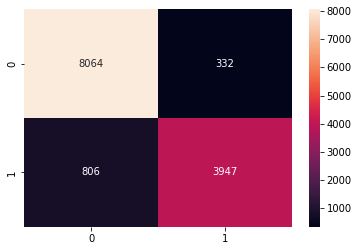

In [3]:
import seaborn as sns
sns.heatmap(np.array([[8064,  332],[806, 3947]]), annot=True, fmt='g')

In [17]:
train.Label.value_counts()

0.0    8400
1.0    4753
Name: Label, dtype: int64

In [19]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
